# Commnity Health Snapshot Analysis

This notebook simulates a small community health dataset and explores:
- Age distribution
- BMI patterns
- Blood pressure trends
- Simple health risk classification

This project is for Python practice in a health data science context.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(42)

n = 200

data = {
    "age": np.random.randint(18, 85, n),
    "sex": np.random.choice(["Male", "Female"], n),
    "bmi": np.round(np.random.normal(27, 5, n), 1),
    "systolic_bp": np.random.randint(100, 170, n),
}

df = pd.DataFrame(data)
df.head()

,age,sex,bmi,systolic_bp
0,69,Male,22.5,104
1,32,Male,25.3,128
2,78,Male,34.8,103
3,38,Male,27.6,109
4,41,Male,29.7,155


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int32  
 1   sex          200 non-null    object 
 2   bmi          200 non-null    float64
 3   systolic_bp  200 non-null    int32  
dtypes: float64(1), int32(2), object(1)
memory usage: 4.8+ KB


In [6]:
df.describe()

,age,bmi,systolic_bp
count,200.000000,200.000000,200.000000
mean,50.295000,27.814000,132.750000
std,20.725969,5.147679,21.464649
min,18.000000,14.700000,100.000000
25%,32.000000,24.775000,113.750000
50%,51.000000,27.800000,132.000000
75%,69.000000,31.700000,152.000000
max,84.000000,38.900000,169.000000


In [7]:
def risk_flag(row):
    if row["bmi"] > 30 or row["systolic_bp"] > 140:
        return "High Risk"
    else:
        return "Low Risk"

df["risk_category"] = df.apply(risk_flag, axis=1)
df.head()

,age,sex,bmi,systolic_bp,risk_category
0,69,Male,22.5,104,Low Risk
1,32,Male,25.3,128,Low Risk
2,78,Male,34.8,103,High Risk
3,38,Male,27.6,109,Low Risk
4,41,Male,29.7,155,High Risk


In [8]:
df["risk_category"].value_counts()

risk_category
High Risk    118
Low Risk      82
Name: count, dtype: int64

In [9]:
df.groupby("sex")["bmi"].mean()

sex
Female    28.202752
Male      27.348352
Name: bmi, dtype: float64

In [10]:
df.groupby("risk_category")["age"].mean()

risk_category
High Risk    49.542373
Low Risk     51.378049
Name: age, dtype: float64

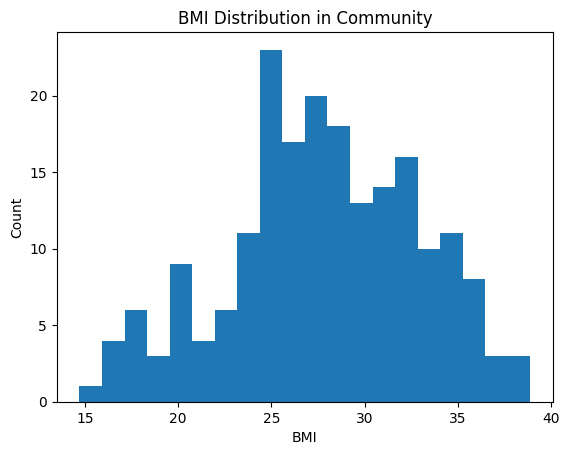

In [11]:
plt.hist(df["bmi"], bins=20)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution in Community")
plt.show()

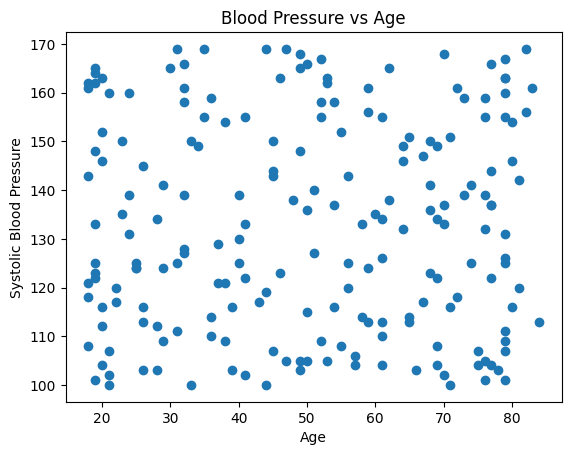

In [12]:
plt.scatter(df["age"], df["systolic_bp"])
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.title("Blood Pressure vs Age")
plt.show()

In [13]:
risk_rate = df["risk_category"].value_counts(normalize=True) * 100
risk_rate

risk_category
High Risk    59.0
Low Risk     41.0
Name: proportion, dtype: float64

In [14]:
df.to_csv("community_health_cleaned.csv", index=False)

In [15]:
!pip install pandas matplotlib numpy